In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
data = pd.read_csv('auto-mpg.csv')
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Text(0, 0.5, 'mpg')

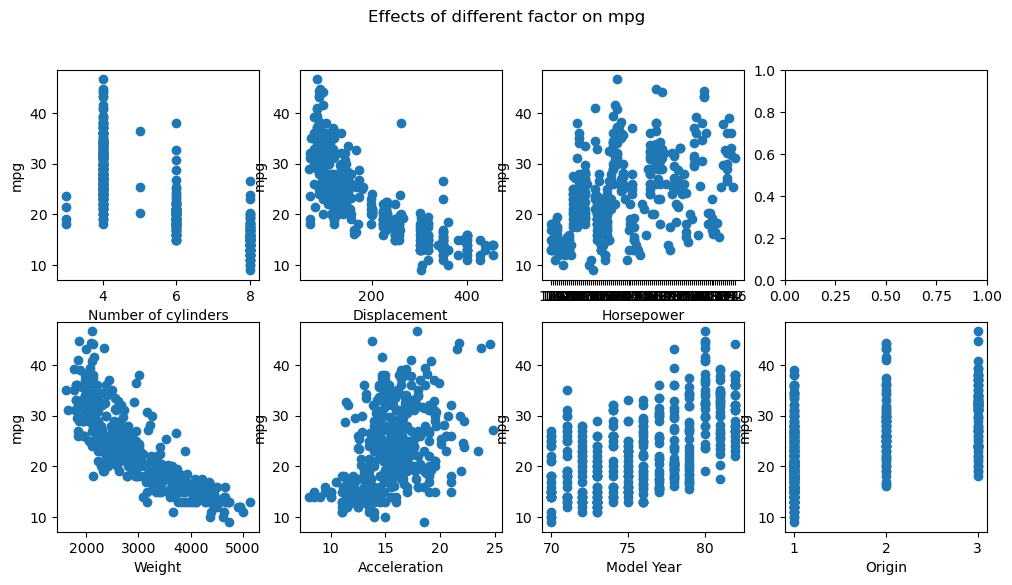

In [2]:
fig, ax = plt.subplots(2, 4, figsize=(12,6))
fig.suptitle("Effects of different factor on mpg")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('Number of cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('Horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['weight'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].set_xlabel('Weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['acceleration'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][1].set_xlabel('Acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['model year'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][2].set_xlabel('Model Year')
ax[1][2].set_ylabel('mpg')

ax[1][3].plot(data['origin'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][3].set_xlabel('Origin')
ax[1][3].set_ylabel('mpg')

In [3]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

In [4]:
# Create a "normalized" version of the data
data['cylinders_Normalized'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data['displacement_Normalized'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data['horsepower_Normalized'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data['weight_Normalized'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data['acceleration_Normalized'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()
data['model_year_Normalized'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data['origin_Normalized'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()

Standard Deviation: 3.3073092094541714


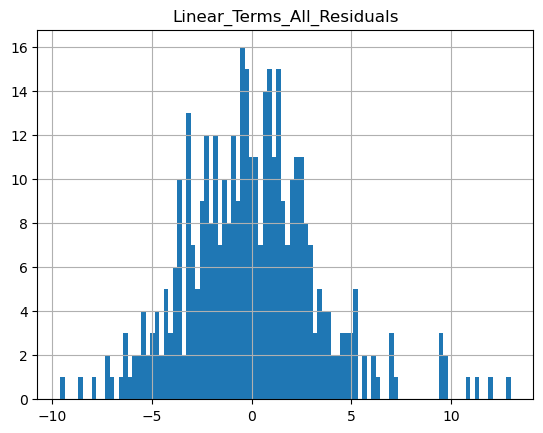

In [5]:
model = smf.ols('mpg ~ cylinders_Normalized + displacement_Normalized + horsepower_Normalized + weight_Normalized + acceleration_Normalized + model_year_Normalized + origin_Normalized', data=data)
model = model.fit()

prediction = model.predict()

# Add this prediction to the DataFrame
data['Linear_Terms_All'] = prediction
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
data['Linear_Terms_All_Residuals'] = data['mpg'] - prediction

hist = data.hist(column='Linear_Terms_All_Residuals', grid=True, bins=100)

print(f"Standard Deviation: {data['Linear_Terms_All_Residuals'].std()}")


In [6]:
#Finding which terms are significant
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        16:04:18   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Standard Deviation: 3.3326606747649774


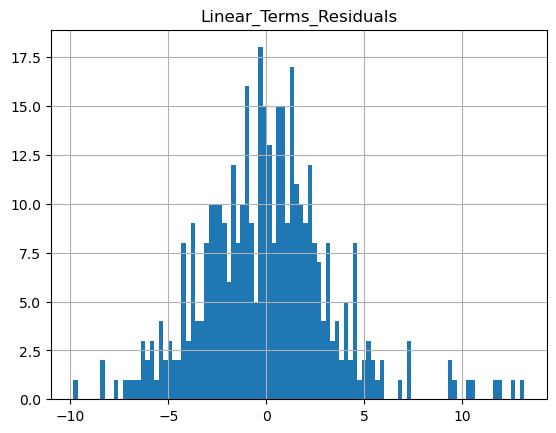

In [7]:
model2 = smf.ols('mpg ~ displacement_Normalized + weight_Normalized + model_year_Normalized + origin_Normalized', data=data)
model2 = model2.fit()

prediction2 = model2.predict()

# Add this prediction to the DataFrame
data['Linear_Terms'] = prediction2
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
data['Linear_Terms_Residuals'] = data['mpg'] - prediction2

hist = data.hist(column='Linear_Terms_Residuals', grid=True, bins=100)

print(f"Standard Deviation: {data['Linear_Terms_Residuals'].std()}")

Standard Deviation: 2.6036618808754732


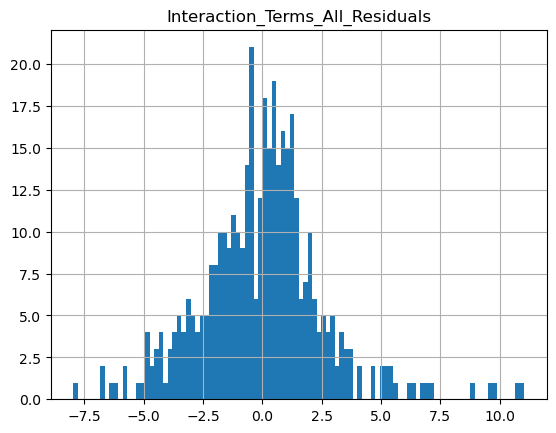

In [8]:
model3 = smf.ols('mpg ~ cylinders_Normalized + displacement_Normalized + horsepower_Normalized + weight_Normalized + acceleration_Normalized + model_year_Normalized + origin_Normalized + cylinders_Normalized * displacement_Normalized + cylinders_Normalized * horsepower_Normalized + cylinders_Normalized * weight_Normalized + cylinders_Normalized * acceleration_Normalized + cylinders_Normalized * model_year_Normalized + cylinders_Normalized * origin_Normalized + displacement_Normalized * horsepower_Normalized + displacement_Normalized * weight_Normalized + displacement_Normalized * acceleration_Normalized + displacement_Normalized * model_year_Normalized + displacement_Normalized * origin_Normalized + horsepower_Normalized * weight_Normalized + horsepower_Normalized * acceleration_Normalized + horsepower_Normalized * model_year_Normalized + horsepower_Normalized * origin_Normalized + weight_Normalized * acceleration_Normalized + weight_Normalized * model_year_Normalized + weight_Normalized * origin_Normalized + acceleration_Normalized * model_year_Normalized + acceleration_Normalized * origin_Normalized + model_year_Normalized * origin_Normalized', data=data)
model3 = model3.fit()

prediction3 = model3.predict()

# Add this prediction to the DataFrame
data['Interaction_Terms_All'] = prediction3
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
data['Interaction_Terms_All_Residuals'] = data['mpg'] - prediction3

hist = data.hist(column='Interaction_Terms_All_Residuals', grid=True, bins=100)

print(f"Standard Deviation: {data['Interaction_Terms_All_Residuals'].std()}")

In [9]:
#Finding which terms are significant
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        16:04:19   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Standard Deviation: 2.7279960628470166


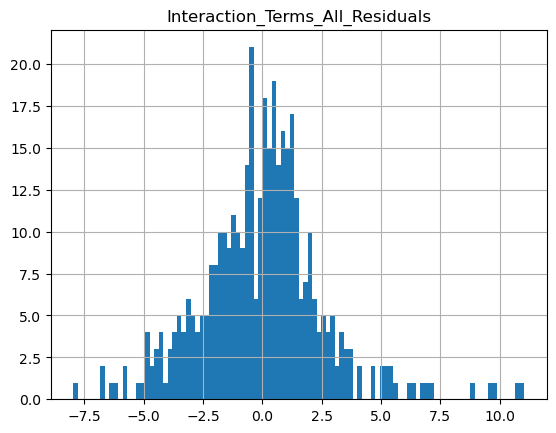

In [10]:
model4 = smf.ols('mpg ~ horsepower_Normalized + weight_Normalized +  + model_year_Normalized + origin_Normalized + displacement_Normalized * weight_Normalized + displacement_Normalized * model_year_Normalized + acceleration_Normalized * model_year_Normalized + acceleration_Normalized * origin_Normalized + model_year_Normalized * origin_Normalized', data=data)
model4 = model4.fit()

prediction4 = model4.predict()

# Add this prediction to the DataFrame
data['Interaction_Terms_Signif'] = prediction4
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
data['Interaction_Terms_Signif_Residuals'] = data['mpg'] - prediction4

hist = data.hist(column='Interaction_Terms_All_Residuals', grid=True, bins=100)

print(f"Standard Deviation: {data['Interaction_Terms_Signif_Residuals'].std()}")